In [2]:
import numpy as np
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)
    
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val,
                    color=color, size=text_size,
                    horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

## Feature Extraction

base에서 수행하는 **feature extraction**은 3개의 기본 연산으로 구성된다.
1. **Filter** an image for a particular feature (convolution)
2. **Detect** that feature within the filtered image (ReLU)
3. **Condense** the image to enhance the features (maximum pooling)

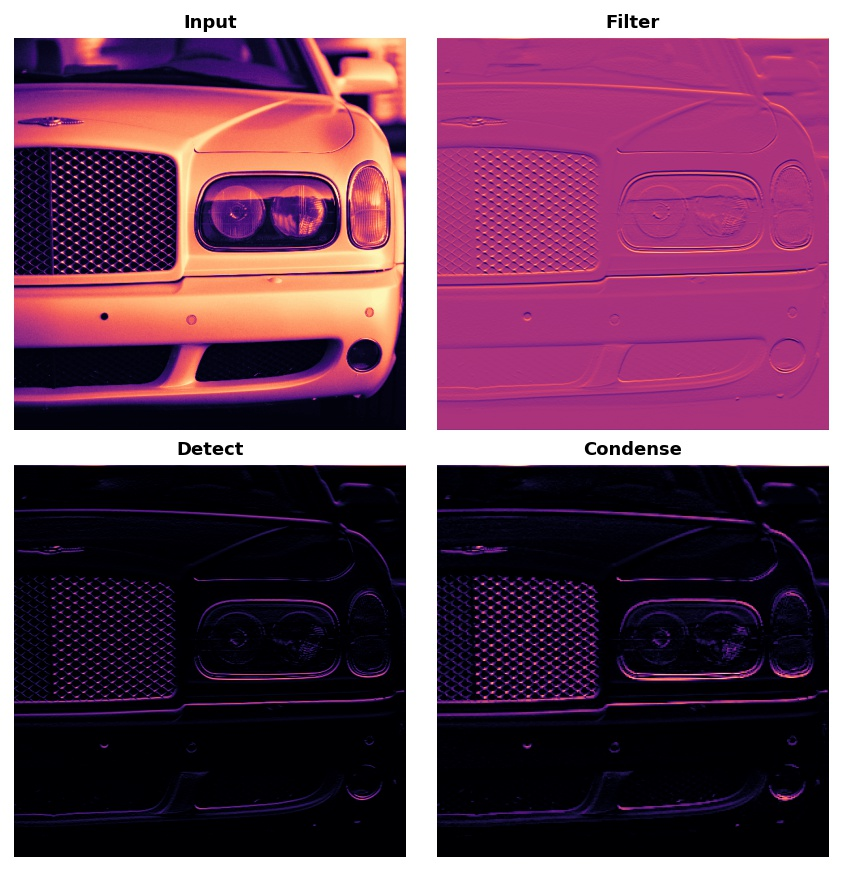

## Filter with Convolution

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3),
])

## Weights
training 중 convnet이 학습하는 **weight**는 주로 convolution layers에 포함되어있다.
이것을 **kernels**이라 부른다. 우리는 이것을 작은 배열로 나타낼 수 있다.
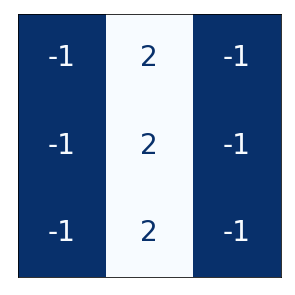
kernel은 이미지를 스캔하고 픽셀 값의 weight의 합을 생성하여 작동한다. 이런 식으로 커널은 일종의 polarized lens처럼 작동하여 특정 패턴의 정보를 강조하거나 덜 강조한다.
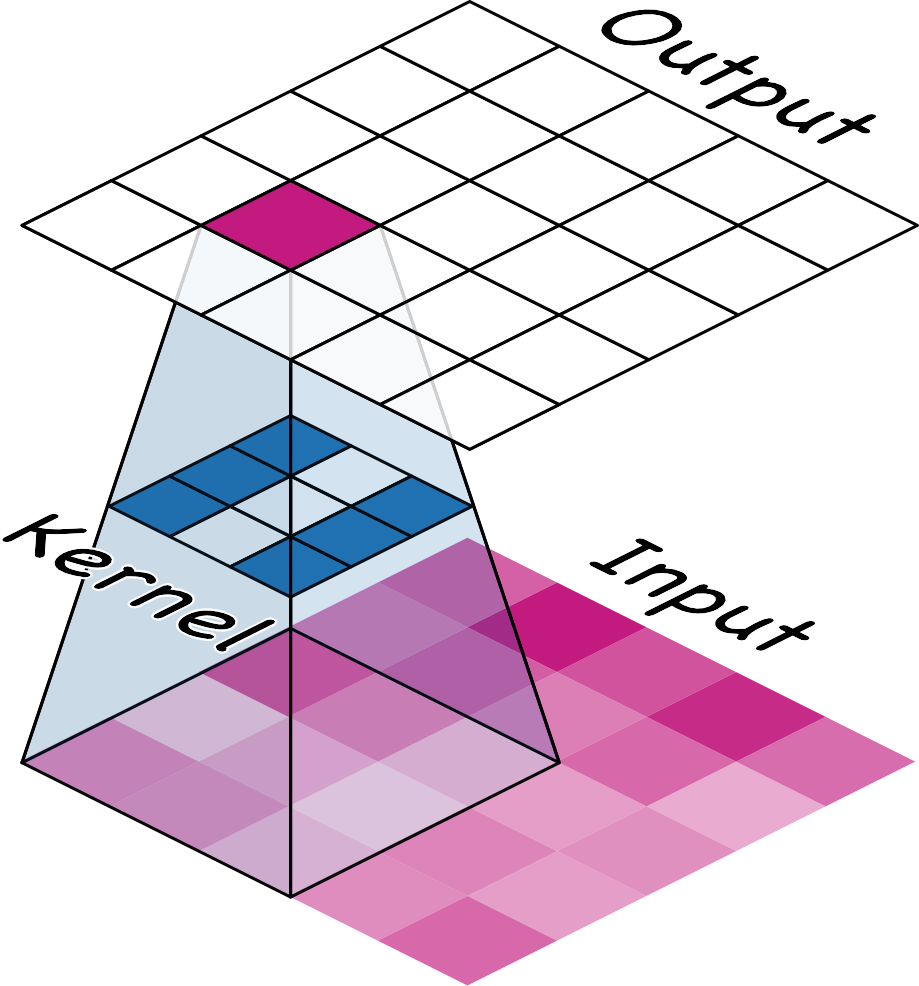
kernel은 convolution layer가 다음 레이어에 연결되는 방식을 정의한다. 위의 kernel은 출력의 각 뉴런을 입력의 9개 뉴런에 연결한다.
```kernel_size```를 통해 kernel의 차원을 설정한다.

## Activations
network에서 activations을 feature maps이라고 한다. 이미지에 필터를 적용할 때 나타나는 결과다. kernel에서 추출한 시각적 기능이 포함되어 있다.
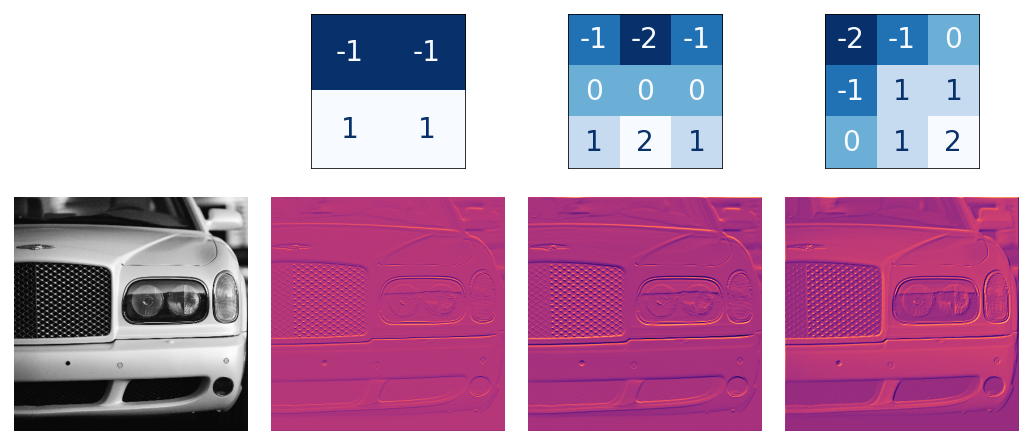

## Detect with ReLU
filtering 후에, feature maps은 activation function을 지나간다. **rectifier function**은 다음과 같은 그래프를 가진다.
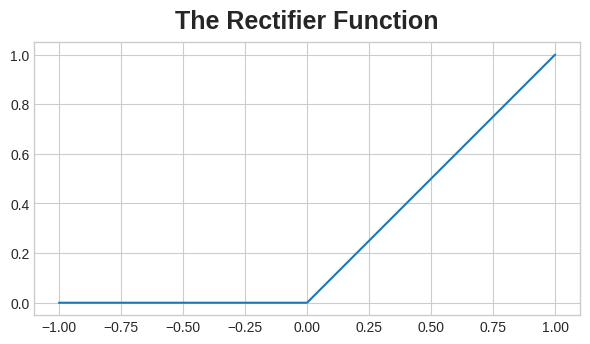

In [4]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu')
])

activation function은 중요도에 따라 픽셀 값을 측정하는 것으로 생각할 수 있다. <br>
다음은 위의 feature maps을 적용한 ReLU다. features를 성공적으로 분리하는 방법에 주목.
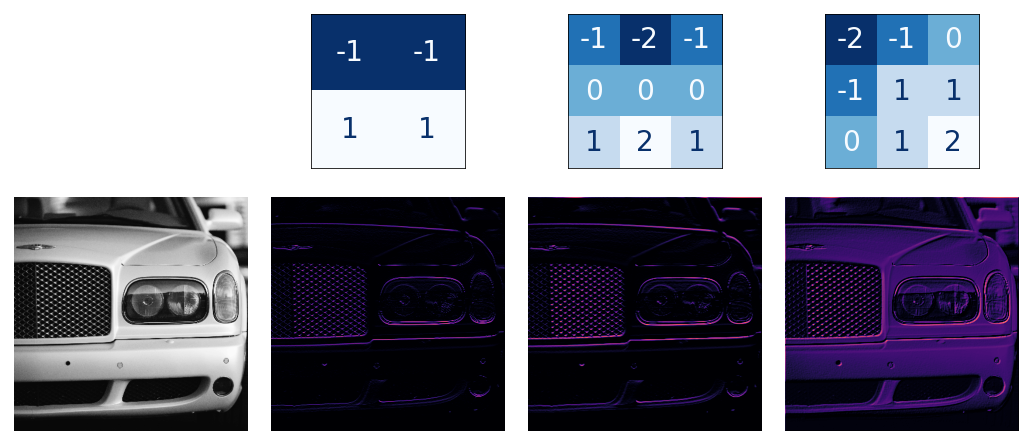

## Example - Apply Convolution and ReLU

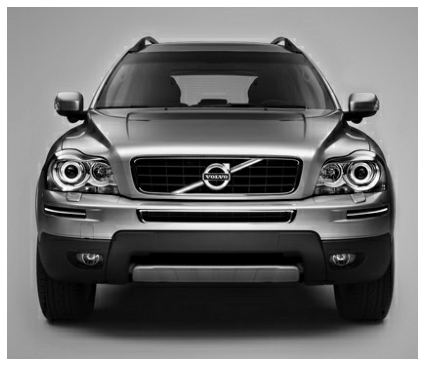

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = '../input/computer-vision-resources/car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

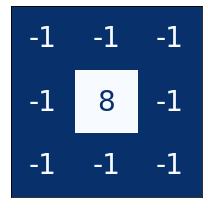

In [46]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3,3))
show_kernel(kernel)

In [47]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

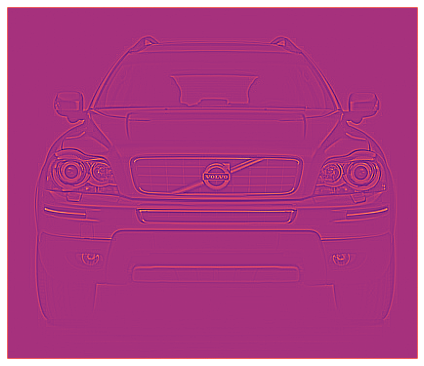

In [48]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

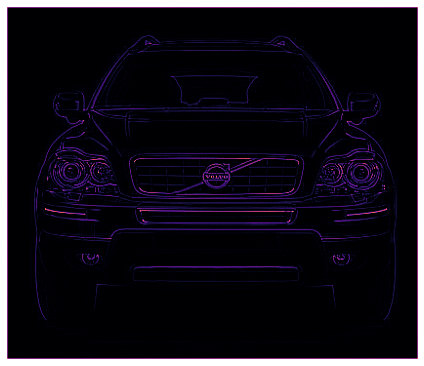

In [49]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();